# Gradient Descent

## Linear Regression

### Loss Function

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

### Gradient Descent

<img width="400" src = "../figures/gradient.png">

### Derivatives

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_\theta(x) - y)^2 \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} \big(\sum_{i=0}^n \theta_ix_i - y\big) \\
&= (h_\theta(x) - y)x_j \\
\end{aligned}
$$

### Updates

$$\theta_j := \theta_j - \alpha * ((h_\theta(x) - y)x_j)$$

### Vector form

$$\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$

In [1]:
import numpy as np

In [2]:
np.__version__

'1.23.5'

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib
matplotlib.__version__

'3.7.1'

## 1. Prepare data

### 1.1 Get your X and y in the right shape

In [5]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [6]:
# diabetes #dictionary of numpy arrays - bunch

print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
X = diabetes.data

In [8]:
X.shape #(442 = number of samples, 10 = features)(m, n)

(442, 10)

In [9]:
m = X.shape[0] # # of samples

In [10]:
n = X.shape[1] # # of features

In [11]:
X[0]  #big letter X represents matrix

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [12]:
y = diabetes.target

In [13]:
y.shape #small letter y represents vector

(442,)

In [14]:
y[0]

151.0

In [15]:
assert m == y.shape[0]

### 1.2 Train test split your data

In [16]:
X.shape

(442, 10)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
y_test.shape

(133,)

### 1.3 Feature scale your data to reach faster convergence

In [19]:
X_train[0]

array([-0.01641217, -0.04464164, -0.05255187, -0.03321323, -0.0442235 ,
       -0.03638651,  0.019187  , -0.03949338, -0.06833155, -0.03007245])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [21]:
X_train[0]

array([-0.30599633, -0.95877769, -1.07310168, -0.71363498, -0.94063341,
       -0.75663014,  0.30179749, -0.77440695, -1.36631681, -0.59408791])

### 1.4 Add intercepts

In [22]:
'''
y = mx + b
y = 2*2 + 3*1 + w0

X = [1 2 3     @ [w0
     1 4 6        w1=2
     1 9 10]      w2=1
     
X @ w = [7
         14
         28 ]

Typical hypothesis function in linear regression:  Theta^T x
'''

'\ny = mx + b\ny = 2*2 + 3*1 + w0\n\nX = [1 2 3     @ [w0\n     1 4 6        w1=2\n     1 9 10]      w2=1\n     \nX @ w = [7\n         14\n         28 ]\n\nTypical hypothesis function in linear regression:  Theta^T x\n'

In [23]:
intercept = np.ones((X_train.shape[0], 1))

In [24]:
X_train = np.concatenate((intercept, X_train), axis = 1)

In [25]:
intercept = np.ones((X_test.shape[0], 1))

In [26]:
X_test = np.concatenate((intercept, X_test), axis = 1)

In [27]:
X_test[0]

array([ 1.        ,  0.96467459, -0.95877769,  0.93180767,  1.00097657,
        0.14477856, -0.49505406,  0.07106242, -0.18614975,  1.40279159,
        1.26197202])

### 1.5. Feature Engineering (optional)

It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target.

Here we gonna skip

## 2. Fit your algorithm 

### 2.1 Define your algorithm

In [28]:
from time import time

In [29]:
theta = np.zeros(X_train.shape[1])

In [30]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
lr = 0.001 #alpha

In [32]:
max_iter = 50

In [33]:
#three steps to gradient descent

start = time()

for i in range(max_iter):
    #1. prediction
    # X @ w
    y_hat = X_train @ theta

    #2. calculate gradient
    # grad = X^T (h - y)
    grad = X_train.T @ (y_hat - y_train)

    #3. update the theta
    # w = w - lr * grad
    theta = theta - lr * grad

time_taken = time() - start

print("Time taken: ", time_taken)
print("Theta: ", theta)

Time taken:  0.0010440349578857422
Theta:  [145.81229636  -1.78474702  -9.83537787  21.54619176  17.67027884
  -5.24974514  -3.42644832  -9.31898754   2.86830843  27.31507452
   0.28072066]


In [34]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#if the magnitude is higher, it means that feature is important (ignore the negative)

### 2.2 Compute accuracy/loss

In [ ]:
#for regression, mean squared error
#for classification, accuracy, recall, precision

In [35]:
def mse(yhat, y):
   return  ((yhat - y)**2).sum() / yhat.shape[0]

In [36]:
#training mse
yhat_train = X_train @ theta

mse_train = mse(yhat_train, y_train)

print("MSE train: ", mse_train)

#testing mse

yhat_test = X_test @ theta

mse_test = mse(yhat_test, y_test)

print("MSE test: ", mse_test)

MSE train:  2956.056024726683
MSE test:  2784.1675634129033


In [ ]:
#there is no overfitting, because our MSE test is not so far away from MSE train

### Some graphs...

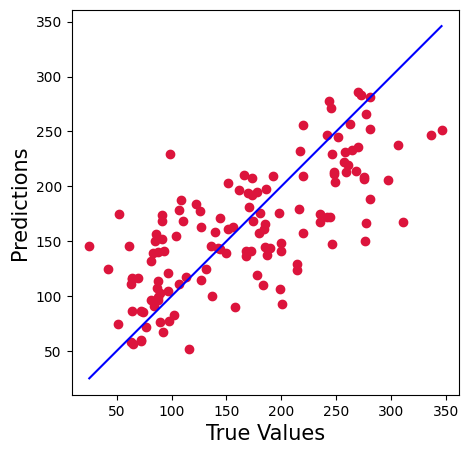

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, yhat_test, c='crimson')

p1 = max(max(yhat_test), max(y_test))
p2 = min(min(yhat_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## 3. Inference

In [39]:
theta

array([145.81229636,  -1.78474702,  -9.83537787,  21.54619176,
        17.67027884,  -5.24974514,  -3.42644832,  -9.31898754,
         2.86830843,  27.31507452,   0.28072066])

In [40]:
X_train[0]

array([ 1.        , -0.30599633, -0.95877769, -1.07310168, -0.71363498,
       -0.94063341, -0.75663014,  0.30179749, -0.77440695, -1.36631681,
       -0.59408791])

In [41]:
my_sample = np.array([3, -0.3, -0.95877769, -1.07310168, -0.71363498,
       -0.94063341, -0.75663014,  0.30179749, -0.77440695, -1.36631681,
       -0.59408791])

In [42]:
my_sample

array([ 3.        , -0.3       , -0.95877769, -1.07310168, -0.71363498,
       -0.94063341, -0.75663014,  0.30179749, -0.77440695, -1.36631681,
       -0.59408791])

In [43]:
my_sample @ theta

376.6800068858815

In [44]:
y_train[0]

181.0